In [1]:
import numpy as np
import pandas as pd

from update import *

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

from sklearn.manifold import TSNE

In [2]:
df_p = pd.read_pickle(r'../data/fifa20_players.pkl')

In [3]:
df_p.tail(2)

,player_id,player_name,overall,quality,resource_id,position,num_games,avg_goals,avg_assists,club,nationality,league,skill_moves,weak_foot,intl_rep,pref_foot,height,weight,revision,def_workrate,att_workrate,added_date,origin,age,pace,pace_acceleration,pace_sprint_speed,shooting,shoot_positioning,shoot_finishing,shoot_shot_power,shoot_long_shots,shoot_volleys,shoot_penalties,passing,pass_vision,pass_crossing,pass_free_kick,pass_short,pass_long,pass_curve,dribbling,drib_agility,drib_balance,drib_reactions,drib_ball_control,drib_dribbling,drib_composure,defending,def_interceptions,def_heading,def_marking,def_stand_tackle,def_slid_tackle,physicality,phys_jumping,phys_stamina,phys_strength,phys_aggression
15311,42978,Dele Alli,87,rare center-block,67319981,CAM,107,0.19,0.23,Tottenham Hotspur,England,Premier League,4,3,0,Right,188,80,Halloween,High,High,2019-10-18,UltimateScream1,23 years old,74,69.0,78.0,83,90.0,84.0,79.0,81.0,80.0,75.0,81,85.0,69.0,69.0,86.0,82.0,76.0,84,76.0,63.0,88.0,88.0,85.0,89,81,84.0,94.0,79.0,79.0,71.0,87,78.0,98.0,79.0,92.0
15312,42979,Sergio Agüero,91,rare center-block,67261943,ST,112,0.92,0.30,Manchester City,Argentina,Premier League,4,4,0,Right,173,70,Halloween,Med,High,2019-10-18,UltimateScream1,31 years old,88,90.0,85.0,92,95.0,95.0,90.0,85.0,86.0,84.0,79,85.0,71.0,74.0,85.0,65.0,85.0,90,85.0,93.0,94.0,91.0,90.0,92,35,25.0,82.0,31.0,30.0,25.0,82,89.0,87.0,82.0,72.0


## Clustering

Encoding and clustering forwards and midfielders with ratings over 80.  

In [4]:
df_p['overall'] = df_p.overall.astype(int)

df = df_p[df_p.overall>80]

Break all players into position dataframes. (minor overlaps w/ CAMs)

In [5]:
fors = df[df.position.isin(['CAM', 'CF', 'ST', 'RW', 'RM', 'RF', 'LW', 'LM', 'LF'])]
print('{} forwards.'.format(fors.shape[0]))

mids = df[df.position.isin(['CAM', 'CM', 'CDM'])]
print('{} midfielders.'.format(mids.shape[0]))

cbs = df[df.position.isin(['CB'])]
print('{} centrebacks.'.format(cbs.shape[0]))

fbs = df[df.position.isin(['LB', 'LWB', 'RB', 'RWB'])]
print('{} fullbacks.'.format(fbs.shape[0]))

397 forwards.
244 midfielders.
111 centrebacks.
55 fullbacks.


In [6]:
df.columns

Index(['player_id', 'player_name', 'overall', 'quality', 'resource_id',
       'position', 'num_games', 'avg_goals', 'avg_assists', 'club',
       'nationality', 'league', 'skill_moves', 'weak_foot', 'intl_rep',
       'pref_foot', 'height', 'weight', 'revision', 'def_workrate',
       'att_workrate', 'added_date', 'origin', 'age', 'pace',
       'pace_acceleration', 'pace_sprint_speed', 'shooting',
       'shoot_positioning', 'shoot_finishing', 'shoot_shot_power',
       'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing',
       'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short',
       'pass_long', 'pass_curve', 'dribbling', 'drib_agility', 'drib_balance',
       'drib_reactions', 'drib_ball_control', 'drib_dribbling',
       'drib_composure', 'defending', 'def_interceptions', 'def_heading',
       'def_marking', 'def_stand_tackle', 'def_slid_tackle', 'physicality',
       'phys_jumping', 'phys_stamina', 'phys_strength', 'phys_aggression'],
      dtype='obj

In [9]:
other_cols = ['player_id', 'player_name', 'overall', 'quality', 'resource_id', 'position',
              'num_games', 'avg_goals', 'avg_assists', 'club', 'nationality', 'league', 'intl_rep',
              'pref_foot', 'weight', 'revision', 'added_date', 'origin', 'age']
stats_cols = [x for x in df.columns if x not in other_cols]

### Forwards

In [17]:
from sklearn.preprocessing import StandardScaler

In [11]:
forw_stats = fors[stats_cols]

In [20]:
cat_vars = ['def_workrate', 'att_workrate']
forw_stats[cat_vars] = forw_stats[cat_vars].replace({'High': 3, 'Med': 2, 'Low': 1})

In [24]:
forw_stats = StandardScaler().fit_transform(forw_stats.values)

In [28]:
X_embedded = TSNE(n_components=2, init='random', random_state=42).fit_transform(forw_stats)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

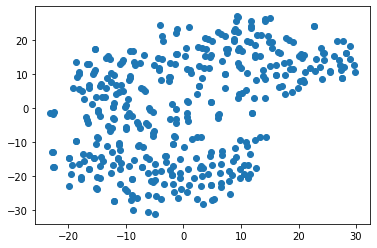

In [35]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

In [29]:
X_embedded

array([[-10.57343   ,  14.138717  ],
       [ -9.343387  ,   9.366742  ],
       [ -9.247291  ,  16.672625  ],
       [-10.755221  ,  13.390428  ],
       [ -9.332575  ,   8.857131  ],
       [ -8.861191  ,  16.597858  ],
       [-10.919469  ,   6.7113185 ],
       [  4.3177133 ,  20.286314  ],
       [-12.848959  ,  14.362664  ],
       [ 14.312635  ,  -8.612821  ],
       [-16.358078  ,  12.952758  ],
       [-13.518186  ,   5.8717937 ],
       [-13.7035265 ,   3.078456  ],
       [  9.607142  ,  17.506432  ],
       [ -1.2365144 ,  15.816145  ],
       [ 12.701364  ,  21.429403  ],
       [ -5.258475  ,  -7.416607  ],
       [-12.687282  ,  10.177577  ],
       [-15.340191  ,  11.183097  ],
       [ -8.122119  ,  -4.1760225 ],
       [-14.881405  ,  -0.6860109 ],
       [ -6.4562697 ,  -4.386503  ],
       [-11.656191  ,   6.681702  ],
       [  3.797224  ,  15.30101   ],
       [ 14.176214  ,  26.167479  ],
       [  6.4424295 ,  21.799557  ],
       [  9.55738   ,  13.154681  ],
 